### July 7th Riddler Express: Beach Swimmers 
***

The July 7th Riddler Express from [FiveThirtyEight](https://fivethirtyeight.com/features/how-many-critics-does-it-take-to-rank-all-the-movies/) is as follows: 

> Two long-distance swimmers are standing on a beach, right on the water’s edge. They begin 100 yards away from one another on the shore, which is a straight line of sand. Both swimmers swim at exactly the same speed. Swimmer A heads straight out to sea, directly perpendicular to the shore. At the same time, Swimmer B also heads out, swimming exactly in the direction of Swimmer A at all times. Over time, Swimmer B will approach a position directly in Swimmer A’s wake, where he will follow her at a fixed distance.

> What is that distance?

This is a bit of a trick question, since always moving directly towards Swimmer $A$ means Swimmer $B$ will never be *exactly* behind him, but we'll think about it in the limit. The **answer** is that Swimmer $B$ will be **50 yards** behind Swimmer $A$ when he is directly in his wake. 

I solved the problem by numerical simulation.  It is easy to set up a system of difference equations that describe the relationship between Swimmer $B$'s position at time $t + \Delta t$, given his and Swimmer $A$'s positions at time $t$. Here I've assumed that the beach front is the $y$-axis, Swimmer $B$ begins at the origin, Swimmer $A$ begins at the position $(0,100)$, and they both travel at a speed of $\nu$.  We then have

\begin{eqnarray}
\nonumber x_B(t + \Delta t) &=& x_B(t) + \nu ~\Delta t ~u_x(t)  \\
\nonumber y_B(t + \Delta t) &=& y_B(t) + \nu ~\Delta t ~u_y(t)  \\
\end{eqnarray}

where $u_x(t)$ and $u_y(t)$ are the $x$- and $y$-components, respectively, of the unit vector describing the direction of travel of Swimmer $B$ at time $t$.  These quantities can be expressed based on the positions of the two swimmers at time $t$.  Note that the position of Swimmer $A$ is described by 

\begin{eqnarray}
\nonumber x_A(t) &=& \nu ~ t \\
\nonumber y_A(t) &=& 100
\end{eqnarray}

We then have 

\begin{eqnarray}
\nonumber u_x(t) &=& \frac{\nu~t - x_B(t)}{\sqrt{[\nu~t-x_B(t)]^2 + [100-y_B(t)]^2}} \\
\nonumber u_y(t) &=& \frac{100 - y_B(t)}{\sqrt{[\nu~t-x_B(t)]^2 + [100-y_B(t)]^2}} \\
\end{eqnarray}

Our final set of difference equations is then 

\begin{eqnarray}
\nonumber x_B(t + \Delta t) &=& x_B(t) + \nu ~ \Delta t ~ \frac{\nu~t - x_B(t)}{\sqrt{[\nu~t-x_B(t)]^2 + [100-y_B(t)]^2}} \\
\nonumber y_B(t + \Delta t) &=& y_B(t) + \nu ~ \Delta t ~ \frac{100 - y_B(t)}{\sqrt{[\nu~t-x_B(t)]^2 + [100-y_B(t)]^2}} \\
\end{eqnarray}

Starting from their initial positions we can then step through time until some suitable stopping criterion is reached (I chose to stop when the $x$-component of the direction vector was within $10^{-14}$ of 1, indicating that Swimmer $B$ was nearly swimming horizontally) and check the distance between $x_B(t)$ and $x_A(t)$.  

The following Julia function runs the simulation for given speed and time-step size and returns the resulting distance. 

In [3]:
using PyPlot

function swimmer_sim(speed, dt, show_plot=true)
# ---------------------------------------------
# Function to simulate the paths of Swimmers 
# ---------------------------------------------
    
    # Initial time, position, and direction parameters  
    xB, yB, t, ux, uy = 0.0, 0.0, 0.0, 0.0, 1.0 
    
    # Arrays to store history of swimmer B for plotting 
    xpos, ypos = [], []

    # Step through time until B's direction is nearly horiztonal 
    while abs(1-ux) > 1e-14
        vx, vy = speed*t-xB, 100-yB
        ux, uy = vx/norm([vx,vy],2), vy/norm([vx,vy],2) 
        xB, yB = xB + speed*dt*ux, yB + speed*dt*uy
        t += dt
        push!(xpos,xB)
        push!(ypos,yB)
    end

    # Compute and print final distance 
    final_dist = speed*t - xB 
    print("distance between swimmers = ", final_dist,"\n")

    # Make plot of position histories 
    if show_plot 
        plot([0,speed*t],[100,100],"b--", label="Swimmer A")
        plot(xpos, ypos, "k", label="Swimmer B")
        plot(xB, yB, "ko")
        plot(speed*t, 100, "bo");
        legend(loc="lower right")
    end
    
    return final_dist
    
end;

Here is the result and picture when the swimmers are traveling at $\nu = 5$ yards per $\texttt{<pick your favorite time unit>}$

distance between swimmers = 50.001250028202435

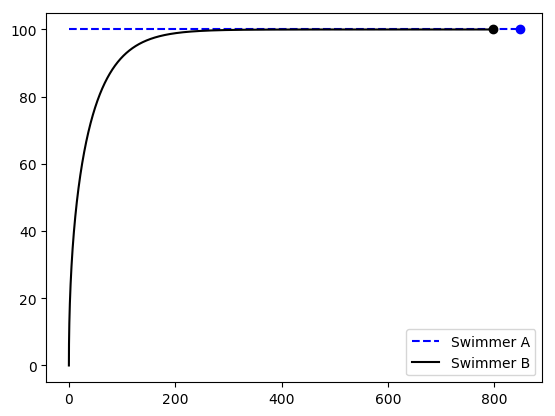

In [2]:
swimmer_sim(5.0, 0.001);

We should probably also check that we obtain the same result regardless of the speeds of the swimmers. 

In [3]:
# Test for speed = 1, 2, 3, 4, and 5
for speed in [ii for ii=1:5] 
    swimmer_sim(speed, 0.001, false);
end

distance between swimmers = 50.000249991526516
distance between swimmers = 50.00050000180863
distance between swimmers = 50.00075000816571
distance between swimmers = 50.001000018359946
distance between swimmers = 50.001250028202435


Finally, we should check that the resulting distance from the simulation is in fact tending to $50$ as $\Delta t \rightarrow 0$ 

In [4]:
# Test for dt = .1, .01, .001, .0001, and .00001
for dt in [0.1^ii for ii=1:5] 
    swimmer_sim(5.0, dt, false);
end

distance between swimmers = 50.12526106941539
distance between swimmers = 50.01250260484869
distance between swimmers = 50.00125002820232
distance between swimmers = 50.00012502579966
distance between swimmers = 50.00001276351054


and it is! 